X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


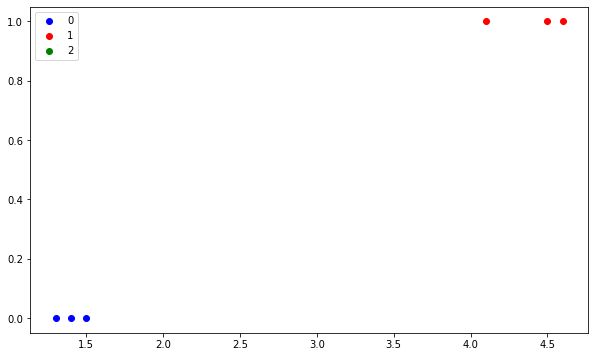

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype('uint8')

print('X:\n', X)
print('y:\n', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()
plt.show()

In [2]:
N = 6
k = 2

# one_hot
import numpy as np

def convert_one_hot(y, k):  
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print(X)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [3]:
# initialize parameters
theta = np.array([[0.1, 0.05], 
                  [0.2, -0.1]])
print('theta:\n', theta)

theta:
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


In [4]:
# some parameters
learning_rate = 0.1
losses = []
num_iter = 100

for epoch in range(num_iter):
    # compute z
    z = X.dot(theta)    

    # compute y_hat
    exp_z = np.exp(z)    
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # compute the gradient dz
    dz = y_hat - y_one_hot

    # compute dtheta
    dtheta = X.T.dot(dz)

    # update
    theta = theta - learning_rate*dtheta

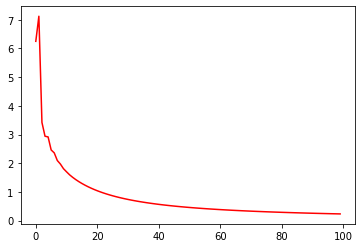

In [5]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [6]:
print(theta)

[[ 3.10740201 -2.95740201]
 [-1.09140016  1.19140016]]


In [7]:
print(X)

[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [8]:
print(y)

[0 0 0 1 1 1]


In [9]:
z = X.dot(theta)    
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[0.94628663 0.05371337]
 [0.95677559 0.04322441]
 [0.93342948 0.06657052]
 [0.01466096 0.98533904]
 [0.03575424 0.96424576]
 [0.0117037  0.9882963 ]]


In [10]:
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1]


In [ ]:
# some parameters
learning_rate = 0.01
losses = []
num_iter = 10

for epoch in range(num_iter):
    #print('X:\n', X)
    #print('y:\n', y_one_hot)

    # evaluate class scores
    z = X.dot(theta)
    #print('Z: ', z)        

    #compute the class probabilities
    exp_z = np.exp(z)
    
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    #print('y_hat:\n', y_hat)
    #print('y_hat shape: ', y_hat.shape)

    # compute the loss
    #print('-------\n', y_hat*y_one_hot)
    loss = -np.log(np.sum(y_hat*y_one_hot, axis=1))
    print('loss:\n', np.sum(loss))

    # compute the gradient on scores
    dz = y_hat - y_one_hot
    #print('dz:\n', dz)

    # backpropate the gradient to the parameters (W,b)
    #dtheta = dz.T.dot(X)
    dtheta = X.T.dot(dz)
    print('dtheta:\n', dtheta)

    # perform a parameter update
    #theta = theta - learning_rate*dtheta        
    #print('theta:\n', theta)
    break